### Tree

* 노드(Node): 트리를 구성하는 기본 요소, 값(key or data)과 하위 노드를 가리키는 포인터(pointer)를 가진다.
* 간선(Edge): 노드와 노드를 연결한 선 (link)

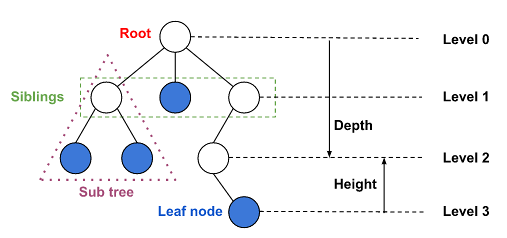


* 루트: 부모 노드가 없는 최상위 노드. 모든 트리의 루트는 하나다.
* 부모(parent) 노드: 자식(child) 노드를 가진 노드
* 자식(child) 노드: 부모 노드의 하위 노드
* 형제(siblings) 노드: 부모가 같은 노드
* 리프(leaf) 노드: 자식이 없는 노드
* 서브 트리(sub tree): 특정 노드를 루트로 생각할 때 생기는 트리


### 이진 트리 특징

* 루트 노드보다 작은 데이터는 왼쪽, 큰 데이터는 오른쪽 노드에 입력된다.
* 데이터를 삭제할 경우, 해당 데이터가 위치한 곳을 찾는다.
* 이후 해당 노드에서 시작하여 가장 낮은 레벨의 오른쪽 값으로 대체한다.

In [5]:
class BinaryTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None

    ## push data using _push_recursive()
    def push(self, data):
        if self.root is None:
            self.root = BinaryTreeNode(data)
        else:
            self._push_recursive(data, self.root)

    
    ## smaller data should go left node of parent
    def _push_recursive(self, data, current_node):
        ## start with current_node(root or parent)
        if data < current_node.data:
            if current_node.left is None:
                current_node.left = BinaryTreeNode(data)
            else:
                self._push_recursive(data, current_node.left)
        else:
            if current_node.right is None:
                current_node.right = BinaryTreeNode(data)
            else:
                self._push_recursive(data, current_node.right)

    def delete(self, data):
        ## return data of _delete_recursive will be new root of Tree
        self.root = self._delete_recursive(data, self.root)

    def _delete_recursive(self, data, current_node):
        if current_node is None:
            return current_node

        if data < current_node.data:
            current_node.left = self._delete_recursive(data, current_node.left)
        elif data > current_node.data:
            current_node.right = self._delete_recursive(data, current_node.right)
        ## finish to find where data is ( data == current_node.data )
        else:
            if current_node.left is None:
                return current_node.right
            elif current_node.right is None:
                return current_node.left
            else:
                # 삭제할 노드의 오른쪽 서브트리에서 가장 작은 값을 찾음
                min_node = self._find_min(current_node.right)
                current_node.data = min_node.data ## 삭제할 노드의 값에 대입
                ## 방금 찾은 오른쪽 서브트리의 최솟값을 제거하는 작업
                current_node.right = self._delete_recursive(min_node.data, current_node.right) 

        return current_node

    ## 삭제할 노드의 자식 노드 중 가장 작은 노드는 왼쪽 서브트리에 있음
    def _find_min(self, current_node):
        while current_node.left is not None:
            current_node = current_node.left
        return current_node

    def display(self):
        self._display_tree(self.root, 0)

    def _display_tree(self, node, level):
        if node is not None:
            self._display_tree(node.right, level + 1)
            print("  " * level + str(node.data))
            self._display_tree(node.left, level + 1)
            
            

In [6]:
tree = Tree()
tree.push(5)
tree.push(3)
tree.push(7)
tree.push(2)
tree.push(4)
tree.push(6)
tree.push(8)

tree.display()


    8
  7
    6
5
    4
  3
    2


In [7]:
tree.delete(3)
tree.display()

    8
  7
    6
5
  4
    2


## 배열로 이진트리 구현하기

* 노드 i의 왼쪽 자식 인덱스: 2*i + 1
* 노드 i의 오른쪽 자식 인덱스: 2*i + 2
* 노드 i의 부모 인덱스: (i - 1) // 2

* 이진탐색트리를 구현하려면 포인터 형식을 써야함

In [ ]:
class BinaryTreeArray:
    def __init__(self):
        self.tree = []

    def push(self, data):
        self.tree.append(data)

    def delete(self, data):
        if data not in self.tree:
            return

        index = self.tree.index(data)
        last_index = len(self.tree) - 1

        # Swap the node to be deleted with the last node
        self.tree[index], self.tree[last_index] = self.tree[last_index], self.tree[index]

        # Remove the last node (which is the node to be deleted)
        self.tree.pop()

    def display(self):
        print(self.tree)


# Test the implementation
tree = BinaryTreeArray()
tree.push(5)
tree.push(3)
tree.push(7)
tree.push(2)
tree.push(4)
tree.push(6)
tree.push(8)

tree.display()  # Output: [5, 3, 7, 2, 4, 6, 8]

tree.delete(3)
tree.display()  # Output: [5, 8, 7, 2, 4, 6]
